### Grade Preduction Model

In [100]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression


In [101]:
#Get student/student-por.csv data
df = pd.read_csv('student-por.csv', sep=';')
# df.head()

print(df)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel freetime  goout  Dalc  Walc health 

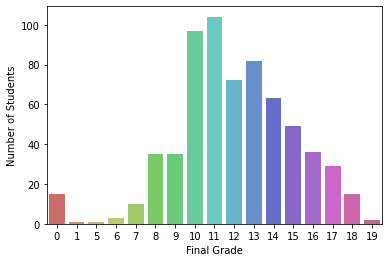

count    649.000000
mean      11.906009
std        3.230656
min        0.000000
10%        8.800000
50%       12.000000
90%       16.000000
max       19.000000
Name: G3, dtype: float64

In [102]:
#Visualize final grade distribution
sns.countplot(x='G3', data=df, palette='hls')
plt.xlabel('Final Grade')
plt.ylabel('Number of Students')
plt.show()


# Print descriptive statistics
df["G3"].describe(percentiles=[0.10, 0.5, 0.9])

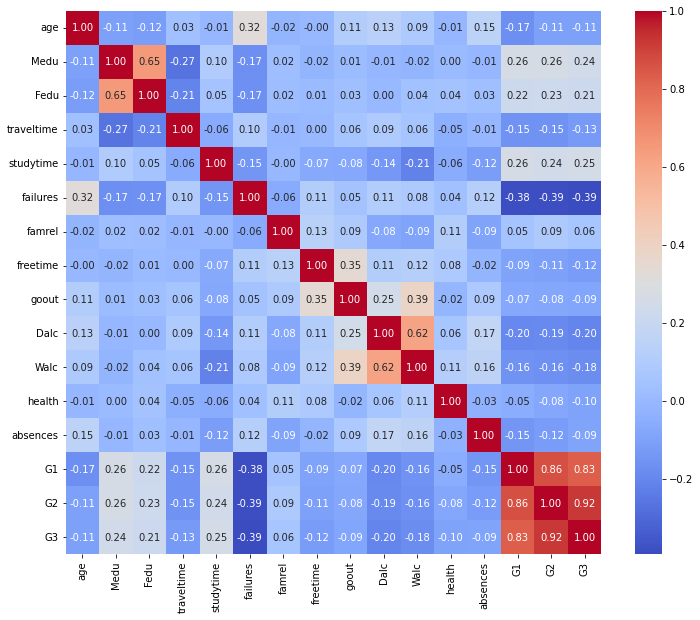

In [103]:
# Create heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


In [104]:
df.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

Prepare the dataset for training by dropping G1 and G2, encoding categorical columns and combining with the numerical columns.

In [105]:
# Specify which features are categorical and which are numerical
categorical_columns = ["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup", "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]
numerical_columns = ["age", "Medu", "traveltime", "studytime", "failures", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "absences"]

# Drop G1 and G2 since we don't want to train the model on previous academic performance.
all_training_data = df.drop(["G2", "G1"],axis=1)

# Encode the categorical columns
data_train_encoded = pd.DataFrame()
for col in categorical_columns:
  LE = LabelEncoder()
  dt = LE.fit_transform(all_training_data[col])
  data_train_encoded[col] = dt

# Combine with the numerical columns
for col in numerical_columns:
  data_train_encoded[col] = all_training_data[col]

# Add in the encoded class column
LE = LabelEncoder()
data_train_encoded['G3'] = LE.fit_transform(all_training_data['G3'])

all_training_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,13


In [106]:
# Alternative clean data
df.drop(['school'], axis=1, inplace=True)

binary = {'yes': 1, 'no': 0}
df['schoolsup'] = df['schoolsup'].map(binary)
df['famsup'] = df['famsup'].map(binary)
df['paid'] = df['paid'].map(binary)
df['activities'] = df['activities'].map(binary)
df['nursery'] = df['nursery'].map(binary)
df['higher'] = df['higher'].map(binary)
df['internet'] = df['internet'].map(binary)
df['romantic'] = df['romantic'].map(binary)

binary = {'M': 1, 'F': 0}
df['sex'] = df['sex'].map(binary)

binary = {'home': 0, 'reputation': 1, 'course': 2, 'other': 3}
df['reason'] = df['reason'].map(binary)

binary = {'U': 1, 'R': 0}
df['address'] = df['address'].map(binary)

binary = {'T': 1, 'A': 0}
df['Pstatus'] = df['Pstatus'].map(binary)


binary = {'LE3': 1, 'GT3': 0}
df['famsize'] = df['famsize'].map(binary)

binary = {'mother': 0, 'father': 1, 'other': 2}
df['guardian'] = df['guardian'].map(binary)

binary = {'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4}
df['Mjob'] = df['Mjob'].map(binary)
df['Fjob'] = df['Fjob'].map(binary)

df.dtypes


sex           int64
age           int64
address       int64
famsize       int64
Pstatus       int64
Medu          int64
Fedu          int64
Mjob          int64
Fjob          int64
reason        int64
guardian      int64
traveltime    int64
studytime     int64
failures      int64
schoolsup     int64
famsup        int64
paid          int64
activities    int64
nursery       int64
higher        int64
internet      int64
romantic      int64
famrel        int64
freetime      int64
goout         int64
Dalc          int64
Walc          int64
health        int64
absences      int64
G1            int64
G2            int64
G3            int64
dtype: object

Train a 

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn import metrics


X = df.drop(['G3'], axis=1)
y = df['G3']


# Check if there are any null values
df.isnull().any()	# OK

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = SVR(kernel='linear')
regressor.fit(X_train, y_train)

# Predict the test set results
y_pred = regressor.predict(X_test)

print(regressor.score(X_test, y_test))

# Print the mean absolute error (MAE)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

# Print the mean squared error (MSE)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))


0.8709236566121077
Mean Absolute Error: 0.6826222780612926
Mean Squared Error: 1.2587158399821428


---
# Alex DG

In [122]:
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


X = df.drop(['G3'], axis=1)
y = df['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


"""Ridge Classifier"""
# Create a Ridge Classifier model and train it on the training data
RC = RidgeClassifier()
RC.fit(X_train, y_train)

# Predict the test set results
y_pred_RC = RC.predict(X_test)

# Evaluate models on test data
accuracy_RC = accuracy_score(y_test, y_pred_RC)
print("---Ridge Classifier---")
print(f"Accuracy: {100*accuracy_RC:.2f}%")

# Print the mean absolute error (MAE)
mae_RC = mean_absolute_error(y_test, y_pred_RC)
print(f"Mean squared error: {mae_RC:.6f}")

# Print the mean squared error (MSE)
mse_RC = mean_squared_error(y_test, y_pred_RC)
print(f"Mean squared error: {mse_RC:.6f}\n")


"""Lasso"""
# Create a Lasso model and train it on the training data
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Predict the test set results
y_pred_lasso = lasso.predict(X_test)

# Print the accuracy
accuracy_lasso = lasso.score(X_test, y_test)
print("---Lasso---")
print(f"Accuracy: {100*accuracy_lasso:.2f}%")

# Print the mean absolute error (MAE)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
print(f"Mean squared error: {mae_lasso:.6f}")

# Print the mean squared error (MSE)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"Mean squared error: {mse_lasso:.6f}\n")


"""ElasticNet
Elastic Net combines feature elimination from Lasso and feature coefficient
reduction from the Ridge model to improve your model's predictions"""
# Create a Lasso model and train it on the training data
EN = ElasticNet()
EN.fit(X_train, y_train)

# Predict the test set results
y_pred_EN = EN.predict(X_test)

# Print the accuracy
accuracy_EN = EN.score(X_test, y_test)
print("---ElasticNet---")
print(f"Accuracy: {100*accuracy_EN:.2f}%")

# Print the mean absolute error (MAE)
mae_EN = mean_absolute_error(y_test, y_pred_EN)
print(f"Mean squared error: {mae_EN:.6f}")

# Print the mean squared error (MSE)
mse_EN = mean_squared_error(y_test, y_pred_EN)
print(f"Mean squared error: {mse_EN:.6f}\n")

---Ridge Classifier---
Accuracy: 30.00%
Mean squared error: 1.438462
Mean squared error: 5.007692

---Lasso---
Accuracy: 86.23%
Mean squared error: 0.723295
Mean squared error: 1.343008

---ElasticNet---
Accuracy: 86.24%
Mean squared error: 0.689892
Mean squared error: 1.341415



---